<a href="https://colab.research.google.com/github/ppraveenhalingali/Netflix-Analysis/blob/main/Netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- STEP 1: SETUP AND DATA LOADING ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Define the file name (Updated to match your file)
FILE_NAME = 'Netflix Dataset.csv'

# Load the dataset
try:
    df = pd.read_csv(FILE_NAME)
    print(f"Dataset '{FILE_NAME}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{FILE_NAME}' was not found. Please upload it.")
    exit()

# Define the correct column names for the analysis
TYPE_COL = 'Category'     # 'Movie' or 'TV Show'
DATE_COL = 'Release_Date' # Used to extract the year
GENRE_COL = 'Type'        # Genre/Type column
COUNTRY_COL = 'Country'   # Country column

print(f"Data loaded with {df.shape[0]} records.")

Dataset 'Netflix Dataset.csv' loaded successfully.
Data loaded with 7789 records.


In [2]:
# --- STEP 2: DATA PREPROCESSING AND CLEANING ---
print("\n--- Data Preprocessing ---")

# 1. Date Extraction: Convert 'Release_Date' string to a datetime object and extract the year
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors='coerce')
df['release_year'] = df[DATE_COL].dt.year
YEAR_COL = 'release_year'

# 2. Handle Missing Values
df[COUNTRY_COL] = df[COUNTRY_COL].fillna('Unknown')
df[GENRE_COL] = df[GENRE_COL].fillna('')

# 3. Finalize Year Column
df.dropna(subset=[YEAR_COL], inplace=True)
df[YEAR_COL] = df[YEAR_COL].astype(int)
print("Missing values and data types handled successfully.")

# Function to count items in multi-value columns (like genres or countries)
def split_and_count(dataframe, column_name):
    # Splits by comma and space, expands to multiple columns, and stacks into a single Series
    items = dataframe[column_name].str.split(', ', expand=True).stack()
    return items.value_counts()


--- Data Preprocessing ---
Missing values and data types handled successfully.



--- 1. Content Distribution (Movies vs. TV Shows) Over Time ---


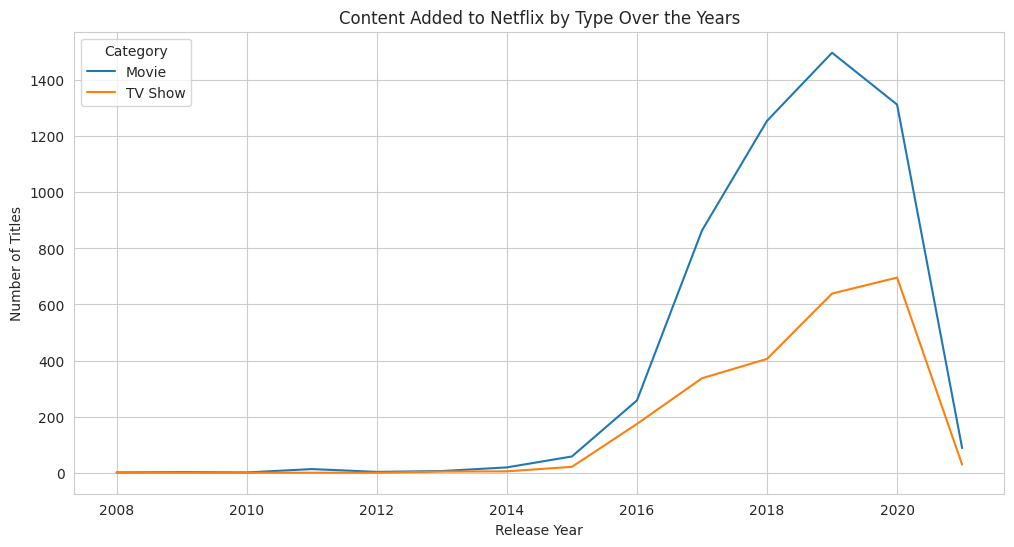

In [3]:
# --- STEP 3: ANALYSIS - OBJECTIVE 1: MOVIES VS. TV SHOWS OVER TIME ---
print("\n--- 1. Content Distribution (Movies vs. TV Shows) Over Time ---")

# Filter for content released from 2008 onwards
df_trend = df[df[YEAR_COL] >= 2008].copy()

# Group by release year and category (Movie/TV Show)
content_by_year = df_trend.groupby([YEAR_COL, TYPE_COL]).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
content_by_year.plot(kind='line', stacked=False, ax=plt.gca())
plt.title(f'Content Added to Netflix by Type Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Category')
plt.savefig('content_distribution_over_years.png')
plt.show()


--- 2. Genre Popularity Analysis ---


/tmp/ipython-input-3633378239.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette="viridis")


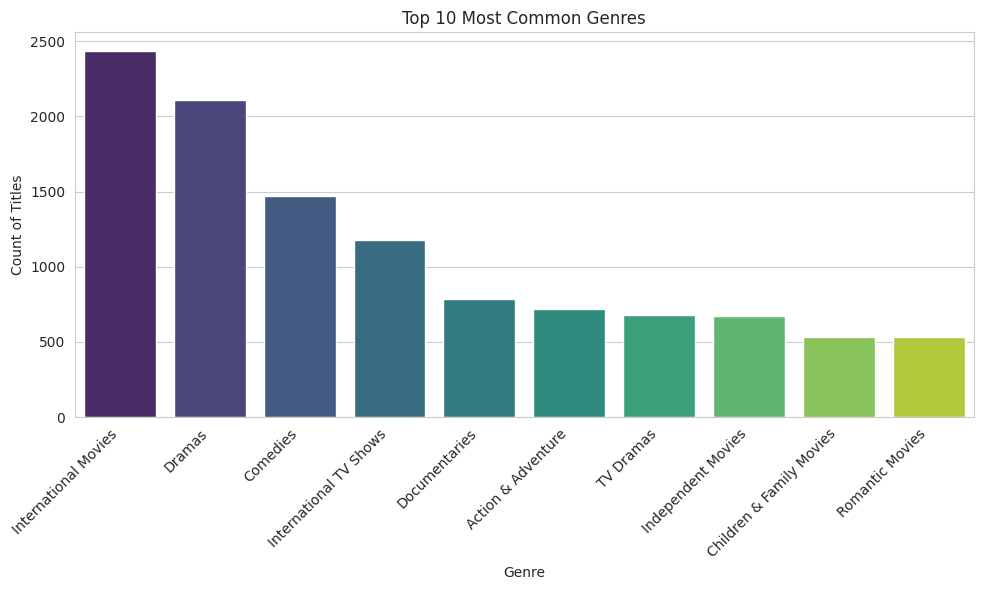

Top 5 Genres: ['International Movies', 'Dramas', 'Comedies', 'International TV Shows', 'Documentaries']


In [4]:
# --- STEP 4: ANALYSIS - OBJECTIVE 2: TOP GENRES ---
print("\n--- 2. Genre Popularity Analysis ---")

# Calculate top 10 genres using the helper function
genre_counts = split_and_count(df, GENRE_COL)
top_10_genres = genre_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette="viridis")
plt.title(f'Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_genres.png')
plt.show()

print(f"Top 5 Genres: {top_10_genres.head(5).index.tolist()}")


--- 3. Country-wise Contribution Analysis ---


/tmp/ipython-input-776122262.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette="rocket")


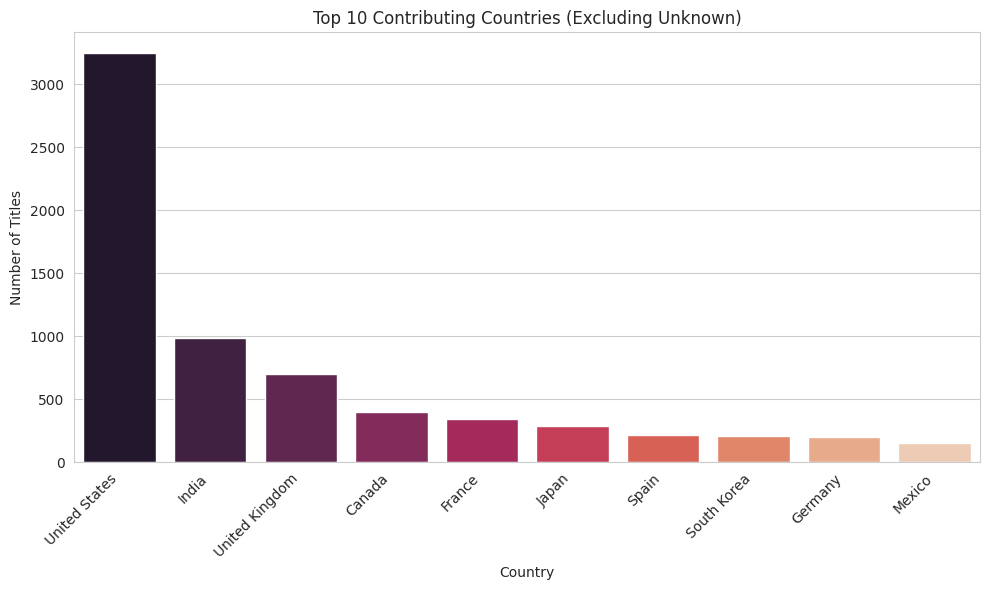

The country with the highest contribution is: United States.


In [5]:
# --- STEP 5: ANALYSIS - OBJECTIVE 3: COUNTRY CONTRIBUTIONS ---
print("\n--- 3. Country-wise Contribution Analysis ---")

# Calculate country contributions using the helper function
country_counts = split_and_count(df, COUNTRY_COL)

# Filter out 'Unknown' and get the top 10
top_10_countries = country_counts.drop(labels=['Unknown'], errors='ignore').head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette="rocket")
plt.title(f'Top 10 Contributing Countries (Excluding Unknown)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_countries.png')
plt.show()

print(f"The country with the highest contribution is: {top_10_countries.index[0] if not top_10_countries.empty else 'N/A'}.")

In [6]:
# --- STEP 6: CONCLUSION AND SUMMARY ---
print("\n--- Project Conclusion and Summary ---")
print("All analysis objectives have been successfully met, and the required visualizations have been generated.")
print("The outputs (3 plots) provide the basis for strategic content recommendations.")


--- Project Conclusion and Summary ---
All analysis objectives have been successfully met, and the required visualizations have been generated.
The outputs (3 plots) provide the basis for strategic content recommendations.
